[9, 1]

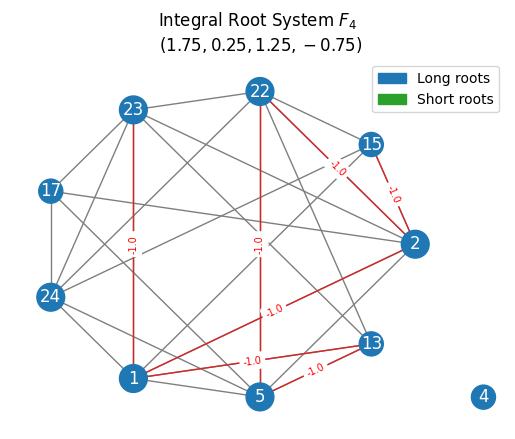

In [14]:
from roots import *
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

test_cases = [
    ('D', 8, np.array([2, 1, 1.1, 3, 0.9, 1.9, 4, 2.1])),
    ('F', 4, np.array([4, 5, 3/2, 1/2])),
    ('E', 8, np.array([1/2, -3/2, -3, -2, -1, -4, -5, -19])),
    ('F', 4, np.array([7/4, 1/4, 5/4, -3/4])),
    ('E', 6, np.array([1, 2, 1, 4, 4.5, 0.5, 0.5, -0.5])),
    ('E', 7, np.array([1/4, 1/4, 1/4, 1/4, 1/4, -3/4, -1, 1])),
    ('E', 8, np.array([1, 5, 9, 13, 9, 1, 5, 9])/4),
    ('E', 7, np.array([1, 3, 5, -7, -9, -11, -1/2, 1/2])),
    ('E', 8, np.array([1, 1, 1, 1, 1, 1, 1/2, 5/2]))
]

typ, rank, weight = 'F', 4, np.array([7/4, 1/4, 5/4, -3/4])
rt, rt_ind = integral_root_system(typ, rank, weight)


cmat = rt @ rt.T
mat = np.abs(rt @ rt.T) > 1e-7
for i in range(mat.shape[0]):
    mat[i, i] = 0
half_num = int(np.round(mat.shape[0]/2))
root_graph = nx.from_numpy_array(mat[:half_num, :half_num])
decomposed = [root_graph.subgraph(c).copy() for c in nx.connected_components(root_graph)]
# pos = nx.spring_layout(root_graph, k=5)
pos = nx.nx_agraph.graphviz_layout(root_graph, prog='circo')
fig, ax = plt.subplots()

color_map = []
size_map = []
for node in root_graph:
    if np.linalg.norm(rt[node]) > 1.1:
        color_map.append('tab:blue')
        size_map.append(400)
    else: 
        color_map.append('tab:green')
        size_map.append(300)
nx.draw(root_graph, 
        pos=pos,
        with_labels=True,
        ax=ax,
        node_color='tab:blue',
        font_color='white',
        node_size=size_map,
        edge_color='tab:grey',
        labels={i: f'{rt_ind[i]+1}' for i in range(half_num)},
        )
edge_labels = {(u, v): f'{cmat[u][v]}' for u, v in root_graph.edges if np.abs(cmat[u][v] + 1) < 1e-7}

nx.draw_networkx_edges(
    root_graph, pos,
    edgelist=[(u, v) for u, v in root_graph.edges if cmat[u][v] < 0],
    edge_color='tab:red'
)

nx.draw_networkx_edge_labels(
    root_graph, pos,
    edge_labels=edge_labels,
    font_color='red',
    font_size=7
)
# Create legend
blue_patch = mpatches.Patch(color='tab:blue', label='Long roots')
green_patch = mpatches.Patch(color='tab:green', label='Short roots')
ax.legend(handles=[blue_patch, green_patch])
ax.title.set_text(f'Integral Root System ${typ}_{str(rank)}$ \n $({", ".join(map(str, weight.tolist()))})$')

[len(g) for g in nx.connected_components(root_graph)]